In [1]:
import json 
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
from glob import glob 

def load_df(log_dir):
    with open(log_dir, 'r') as f:
        data = f.readlines()
    df = pd.DataFrame(list(pd.Series(data).map(eval).values))    
    return df 

def load_log_data(class_name, version, result_dir,method):

    df = pd.DataFrame()
    for i,v in enumerate(version):
        log_dir = os.path.join(result_dir,class_name,method,v,'log.txt')
        
        temp_df = load_df(log_dir)
        temp_df['hue'] = v 
        
        df = pd.concat([df,temp_df])
    
    return df 

def plot_log(data,class_name, metrics:list, figsize:tuple = (10,7)):
    
    fig, axes = plt.subplots(len(metrics),1,figsize=figsize)
    
    for ax, metric in zip(axes, metrics):
        sns.lineplot(
            x = 'epoch',
            y = metric,
            data = data,
            hue = data['hue'],
            ax = ax 
        )
        
    fig.suptitle(class_name)
    plt.show()

# STPM 

## Anomaly Ratio 비교 

In [73]:
anomaly_ratio=[0,0.02,0.04,0.06,0.08,0.1]
coreset_ratio=[0.01,0.1,0.25]


result_dir = './results/benchmark/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'STPM'
df = pd.DataFrame()

for ar in anomaly_ratio:
    version = f'base-anomaly_ratio_{ar}'
    log_dirs = glob(os.path.join(result_dir,method,'*',version,'results_seed0_best.json'))
    

    for log_dir in log_dirs:
        temp_df = pd.DataFrame(json.load(open(log_dir)))
        
        temp_df['class'] = log_dir.split('/')[-3]
        temp_df['anomaly_ratio'] = ar 
        temp_df['coreset_ratio'] = cr 
        
        df = pd.concat([df,temp_df])    
df = df.reset_index()    

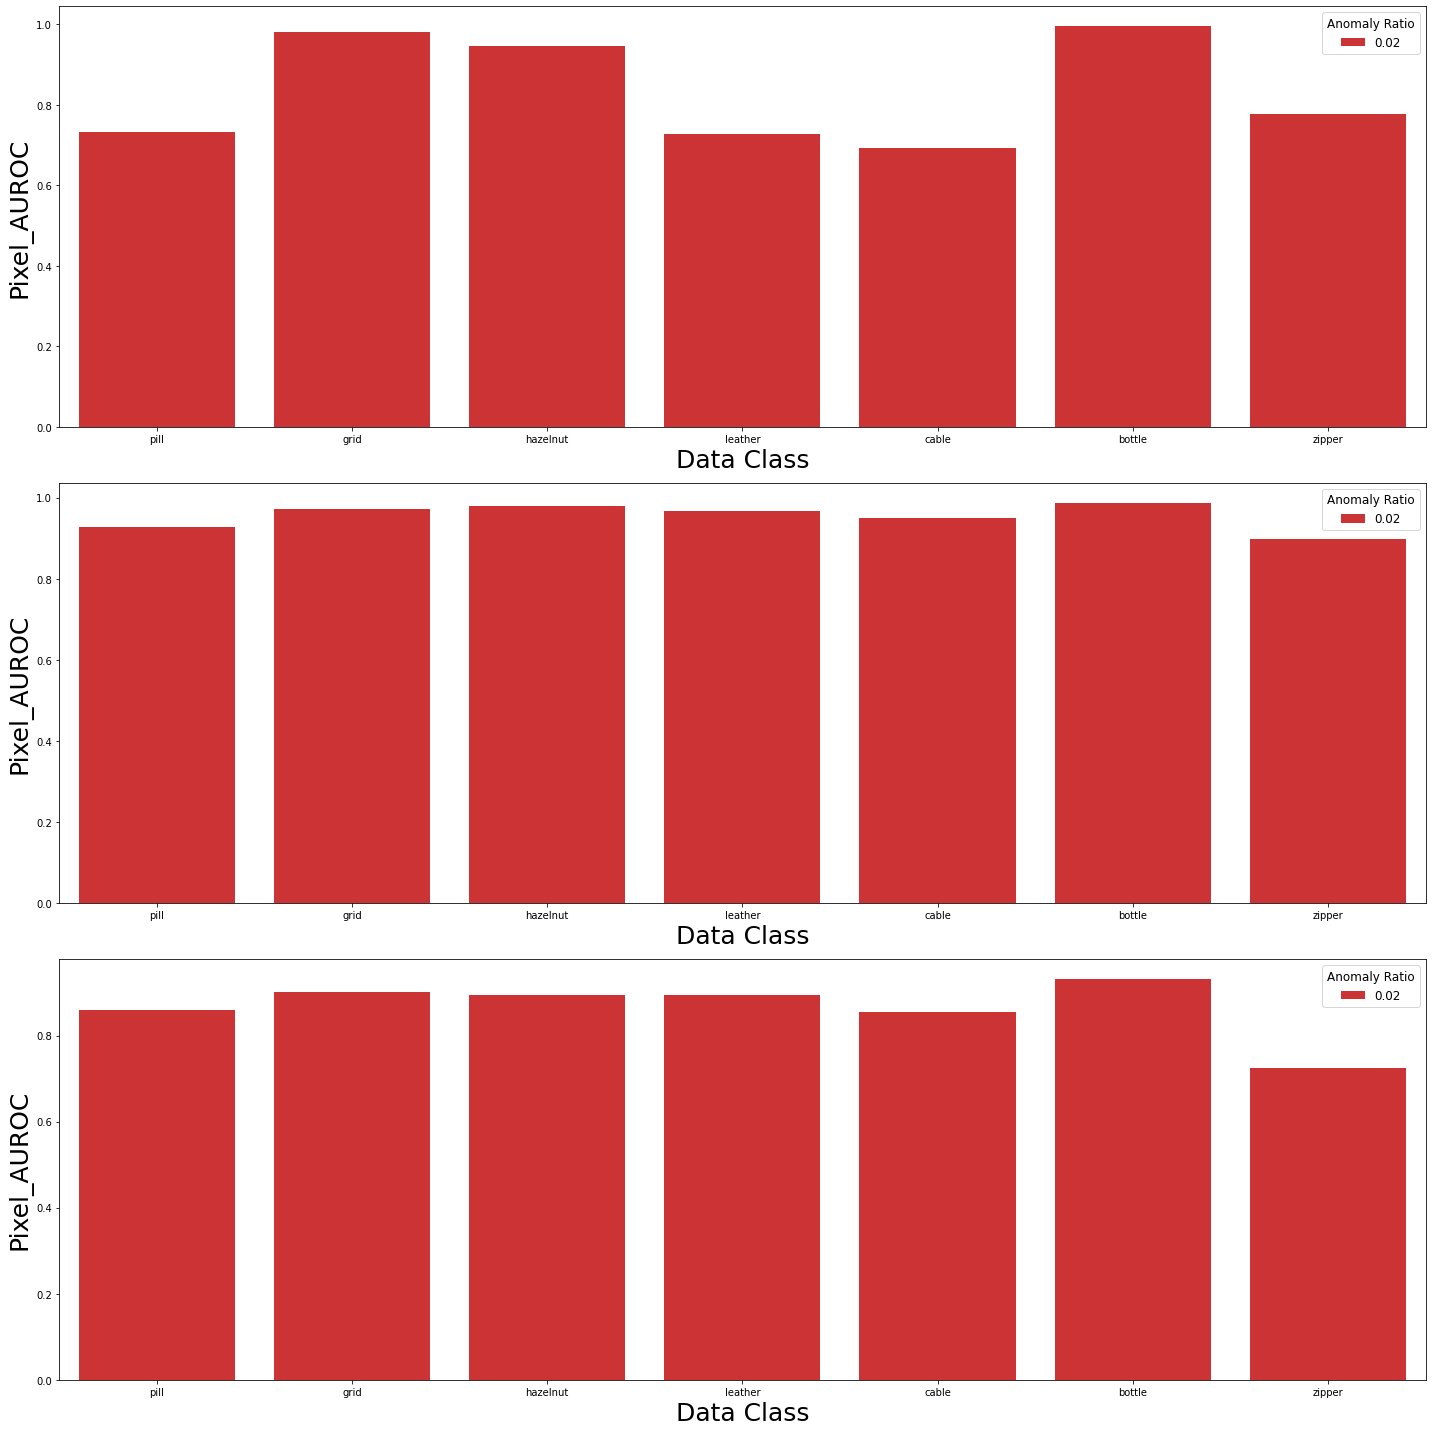

In [78]:
metrics = ['image_auroc','pixel_auroc','aupro']
coreset_ratio=[0.25, 0.1, 0.01]
fig, axes = plt.subplots(3,1 ,figsize=(20,20))
for i, (ax, m) in enumerate(zip(axes,metrics)):
    temp_df = df[df['index']==m]
    
    sns.barplot(
        x = 'class',
        y = 'test',
        data = temp_df,
        hue = 'anomaly_ratio',
        ax = ax 
    )
    

    ax.set_xlabel("Data Class", fontsize=25)  # x 축 레이블 추가
    ax.set_ylabel("Pixel_AUROC", fontsize=25)  # y 축 레이블 추가
    ax.legend(title="Anomaly Ratio", fontsize=12, title_fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()    

# PatchCore Base 

## 성능 재현 확인 

In [75]:
version = ['coreset_ratio-coreset_ratio_0.1-anomaly_ratio_0']
result_dir = './results/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'PatchCore'

log_dirs = glob(os.path.join(result_dir,method,'*',version[0],'results_seed0_best.json'))
df = pd.DataFrame()

for log_dir in log_dirs:
    temp_df = pd.DataFrame(json.load(open(log_dir)))
    temp_df['class'] = log_dir.split('/')[-3]
    df = pd.concat([df,temp_df])    
df = df.reset_index()    
df = df.pivot(index='class', columns='index', values='test')
df_25 = df.reset_index()

## Anomaly Ratio 비교 

In [2]:
anomaly_ratio=[0,0.02,0.04,0.06,0.08,0.1]
coreset_ratio=[0.01,0.1,0.25]


result_dir = './results/MVTecAD/'
metrics = ['test_pixel_auroc','test_aupro']
method = 'PatchCore'
df = pd.DataFrame()

for ar in anomaly_ratio:
    for cr in coreset_ratio:
        version = f'coreset_ratio-coreset_ratio_{cr}-anomaly_ratio_{ar}'
        log_dirs = glob(os.path.join(result_dir,method,'*',version,'results_seed0_best.json'))
        

        for log_dir in log_dirs:
            temp_df = pd.DataFrame(json.load(open(log_dir)))
            
            temp_df['class'] = log_dir.split('/')[-3]
            temp_df['anomaly_ratio'] = ar 
            temp_df['coreset_ratio'] = cr 
            
            df = pd.concat([df,temp_df])    
df = df.reset_index()    


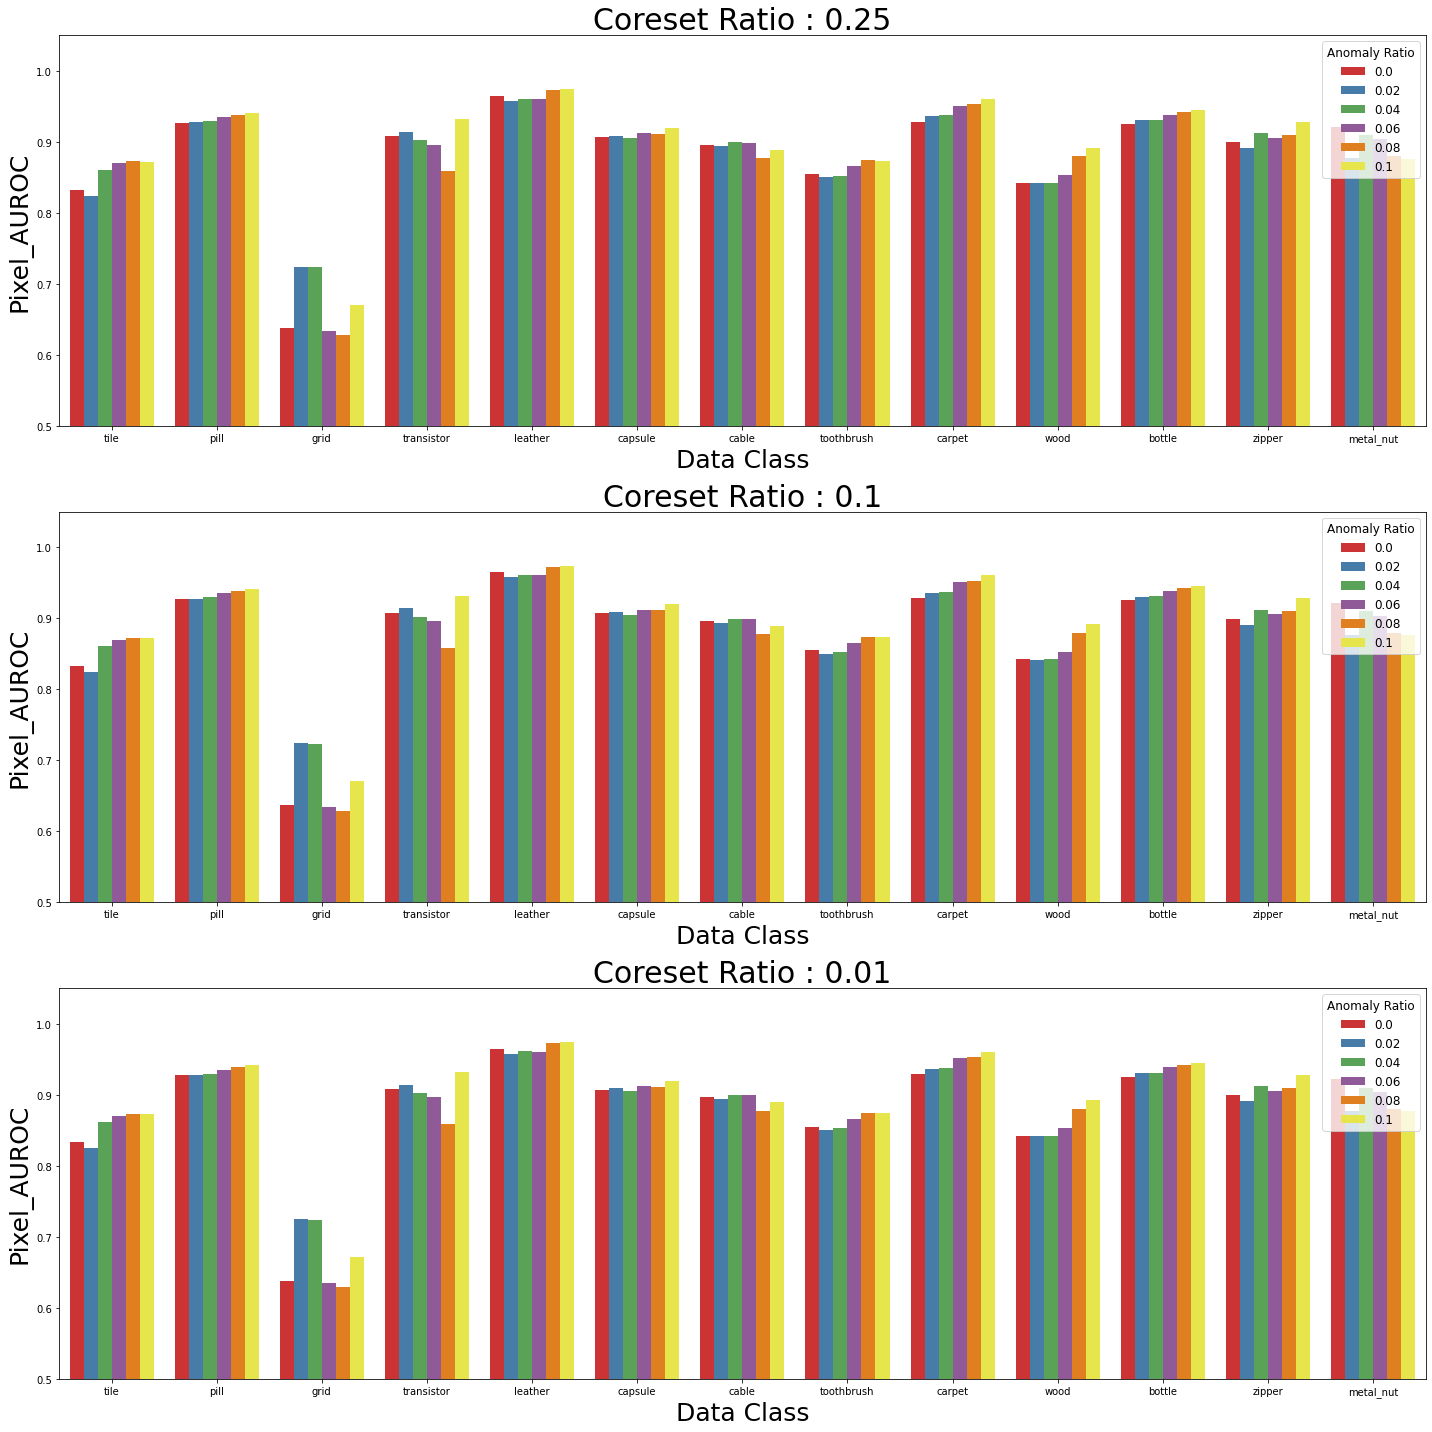

In [58]:
metrics = ['image_auroc','pixel_auroc','aupro']
coreset_ratio=[0.25, 0.1, 0.01]
fig, axes = plt.subplots(3,1 ,figsize=(20,20))
for i, (ax, cr) in enumerate(zip(axes,coreset_ratio)):
    temp_df = df[df['coreset_ratio'] == cr]
    temp_df = temp_df[temp_df['coreset_ratio']==0.25]
    temp_df = temp_df[temp_df['index']=='pixel_auroc']
    
    sns.barplot(
        x = 'class',
        y = 'test',
        data = temp_df_25,
        hue = 'anomaly_ratio',
        ax = ax 
    )
    ax.set_ylim(0.5,1.05)

    ax.set_title(f"Coreset Ratio : {cr}", fontsize=30)
    ax.set_xlabel("Data Class", fontsize=25)  # x 축 레이블 추가
    ax.set_ylabel("Pixel_AUROC", fontsize=25)  # y 축 레이블 추가
    ax.legend(title="Anomaly Ratio", fontsize=12, title_fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()    

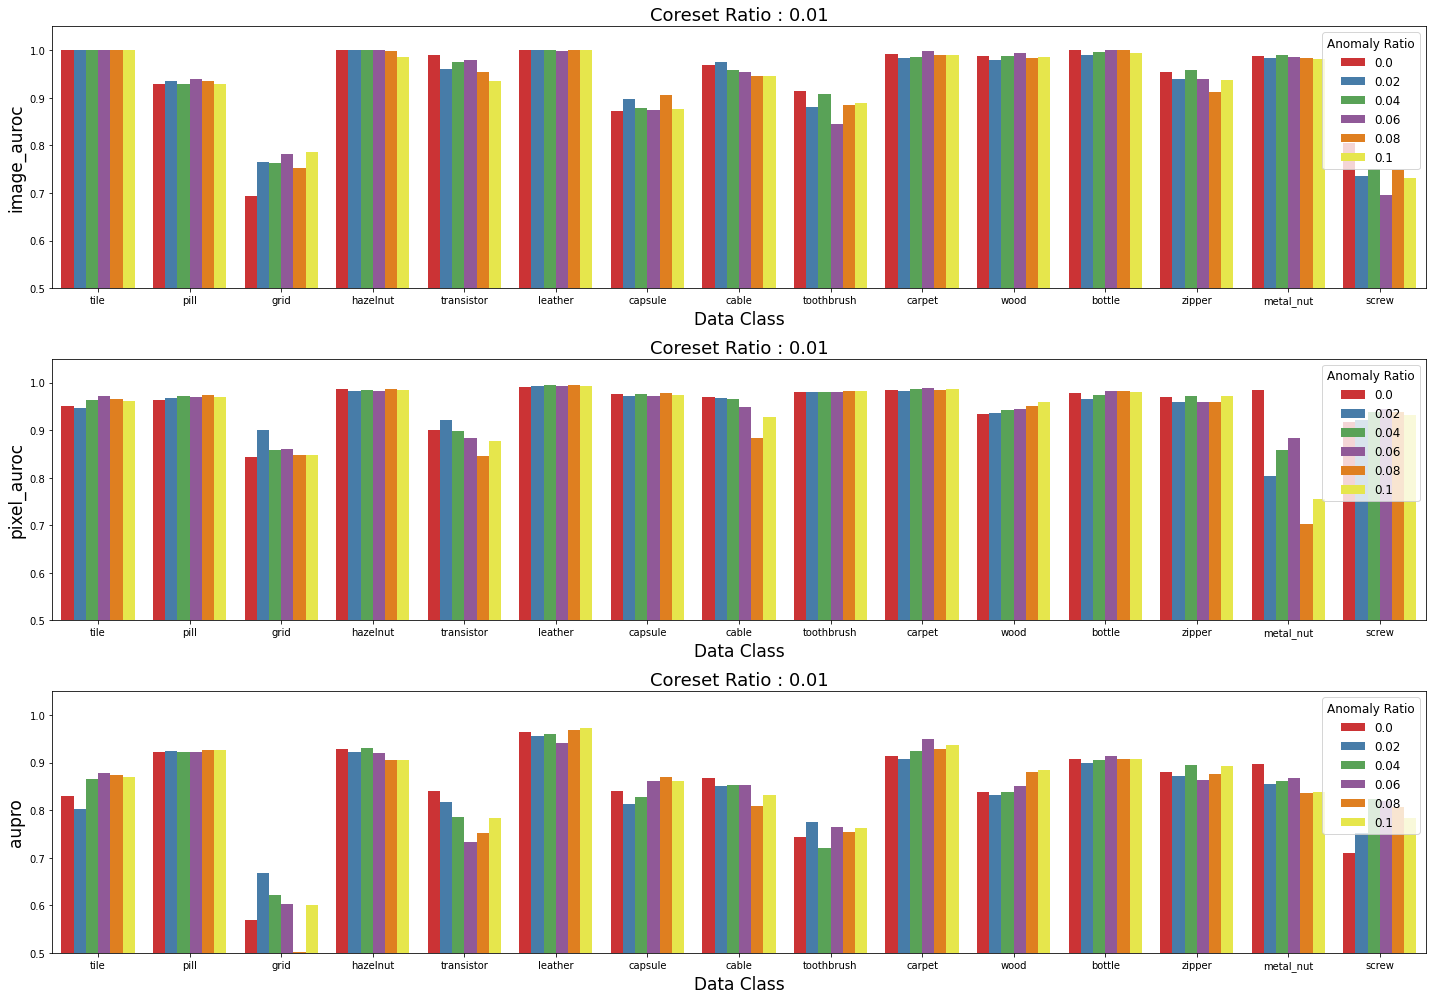

In [54]:
metrics = ['image_auroc','pixel_auroc','aupro']
coreset_ratio=[0.25, 0.1, 0.01]
cr = coreset_ratio[2]
fig, axes = plt.subplots(3,1 ,figsize=(20,14))
for i, (ax, m) in enumerate(zip(axes,metrics)):
    temp_df = df[df['index'] == m]
    temp_df = temp_df[temp_df['coreset_ratio']==cr]
    
    
    sns.barplot(
        x = 'class',
        y = 'test',
        data = temp_df,
        hue = 'anomaly_ratio',
        ax = ax 
    )
    ax.set_ylim(0.5,1.05)

    ax.set_title(f"Coreset Ratio : {cr}", fontsize=18)
    ax.set_xlabel("Data Class", fontsize=17)  # x 축 레이블 추가
    ax.legend(title="Anomaly Ratio", fontsize=12, title_fontsize=12, loc="upper right")
    ax.set_ylabel(f"{m}", fontsize=17)  # y 축 레이블 추가
plt.tight_layout()
plt.show()    

/tmp/ipykernel_29031/3830231802.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_29031/3830231802.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(
/tmp/ipykernel_29031/3830231802.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(


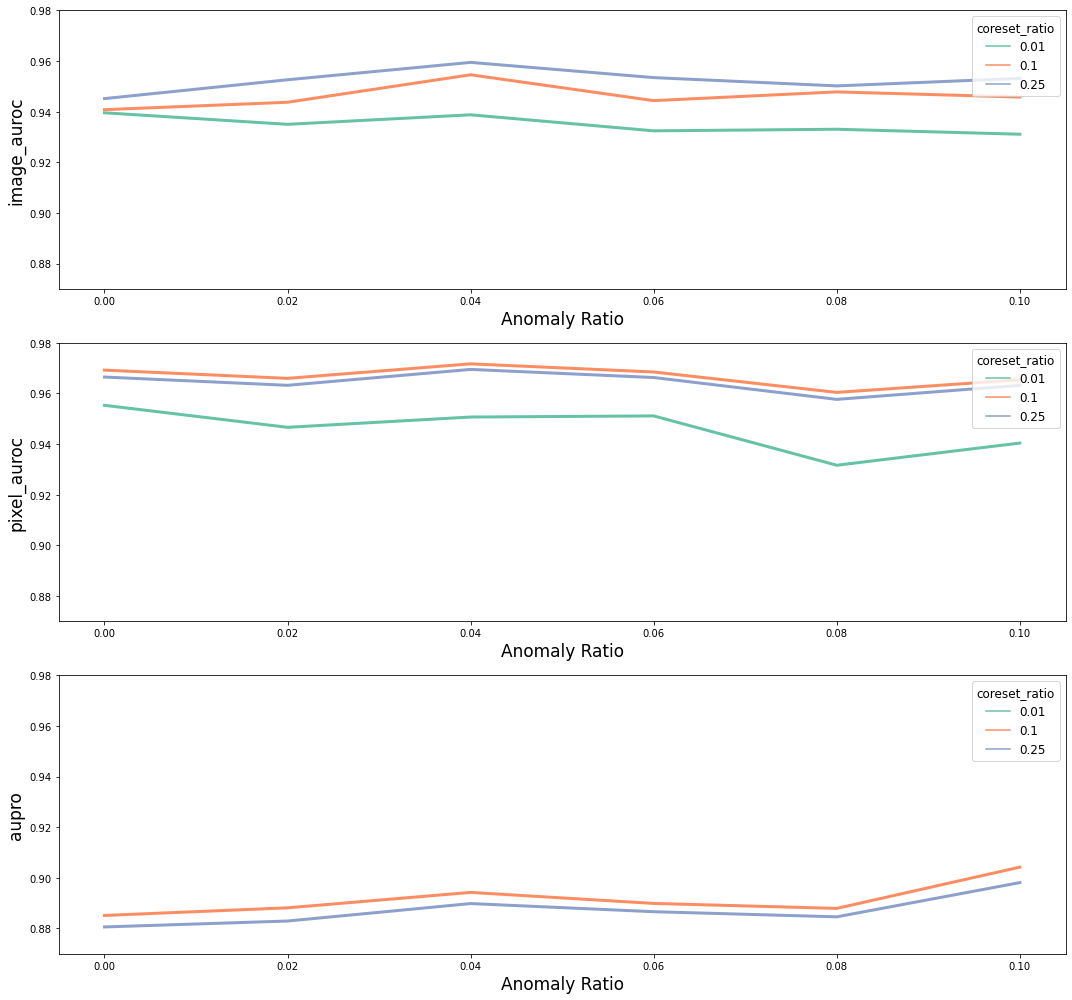

In [32]:
df = df.drop(df[(df['class'] == 'screw') & (df['coreset_ratio'] == 0.25)].index)
df = df.drop(df[(df['class'] == 'hazelnut') & (df['coreset_ratio'] == 0.25)].index)
temp_df = df.groupby(['coreset_ratio','index','anomaly_ratio']).mean().reset_index()
metrics = ['image_auroc','pixel_auroc','aupro']

fig, axes = plt.subplots(3,1 ,figsize=(15,14))
for i, (ax, m) in enumerate(zip(axes,metrics)):
    temp_df = df[df['index'] == m].groupby(['anomaly_ratio','coreset_ratio']).mean().reset_index()
    
    sns.lineplot(
        x = 'anomaly_ratio',
        y = 'test',
        data = temp_df,
        hue = 'coreset_ratio',
        ax = ax,
        linewidth=3,
        palette=sns.color_palette('Set2', n_colors=5)
    )
    
    ax.set_ylim(0.87, 0.98)
    ax.set_xlabel("Anomaly Ratio", fontsize=17)  # x 축 레이블 추가
    ax.legend(title="coreset_ratio", fontsize=12, title_fontsize=12, loc="upper right")
    ax.set_ylabel(f"{m}", fontsize=17)  # y 축 레이블 추가
plt.tight_layout()
plt.show()    